In [16]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import math

In [7]:
def sMAPE(a, b):
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [8]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [28]:

def lstm_univariate_loop(dataset):
    
    dataset = df.values
    dataset = df.astype('float32')
    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    print('Spliting into train and test')
    train_size = int(33600)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    testY_rmsle = testY.copy()
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    print('Creating and fitting the LSTM network')
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=5, batch_size=70, verbose=1,validation_split=0.04)
    
    # make predictions
    print('Making predictions')
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    #Metrics
    print('Calculating metrics')
    mape_i = sMAPE(testY_rmsle,testPredict)
    rmsle_i = rmsle(testY_rmsle,testPredict)
    
    return mape_i, rmsle_i

In [29]:
# load the dataset
path = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/"
all_files = glob.glob(path + "/*.csv")

i = 0
mape_t = []
rmsle_t = []
for filename in all_files:
    i = i + 1
    print('filename number ' + str(i))
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True)
    mape_i,rmsle_i = lstm_univariate_loop(df)
    mape_t.append(mape_i)
    rmsle_t.append(rmsle_i)

filename number 1
Spliting into train and test
Creating and fitting the LSTM network
Train on 30869 samples, validate on 1287 samples
Epoch 1/5
30869/30869 [==============================] - 2s 61us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 2/5
30869/30869 [==============================] - 1s 40us/step - loss: 0.0021 - val_loss: 0.0026
Epoch 3/5
30869/30869 [==============================] - 1s 40us/step - loss: 0.0021 - val_loss: 0.0026
Epoch 4/5
30869/30869 [==============================] - 1s 39us/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/5
30869/30869 [==============================] - 2s 50us/step - loss: 0.0021 - val_loss: 0.0026
Making predictions
Calculating metrics
filename number 2
Spliting into train and test
Creating and fitting the LSTM network
Train on 30869 samples, validate on 1287 samples
Epoch 1/5
30869/30869 [==============================] - 2s 79us/step - loss: 0.0025 - val_loss: 0.0028
Epoch 2/5
30869/30869 [==============================] - 1s 47us/step

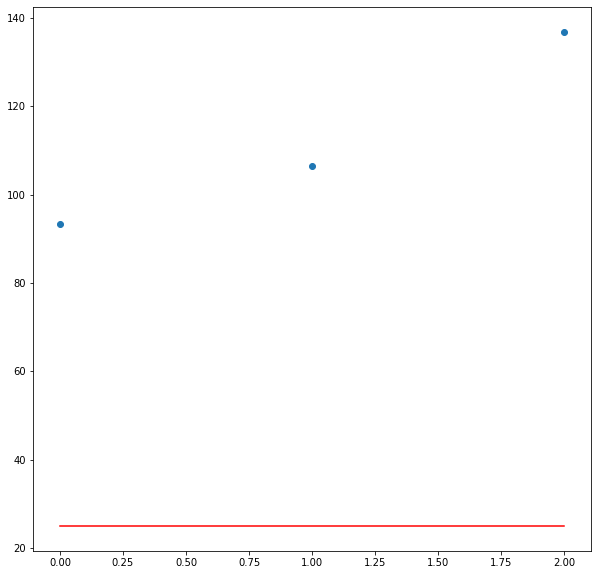

In [30]:
plt.figure(figsize = (10,10))
plt.scatter(range(348),mape_t)
plt.plot(range(348),[25]*348,color = 'red')
plt.show()

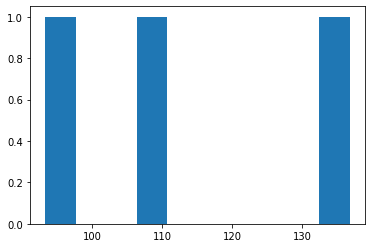

In [34]:
plt.hist(mape_t)
plt.show()

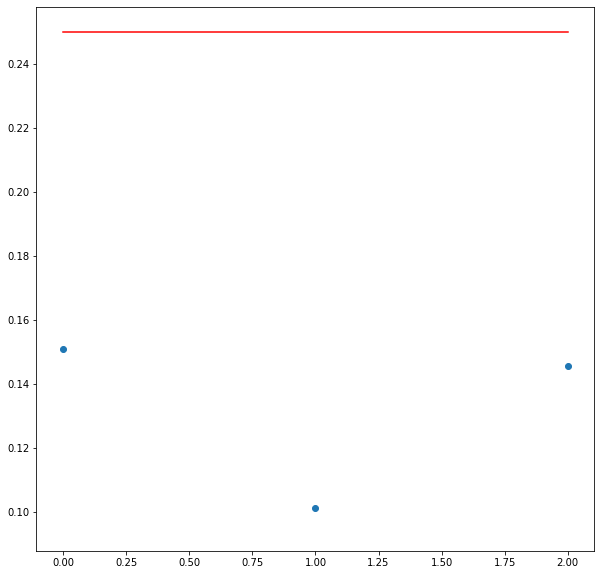

In [37]:
plt.figure(figsize = (10,10))
plt.scatter(range(348),rmsle_t)
plt.plot(range(3),[0.25]*348,color = 'red')
plt.show()

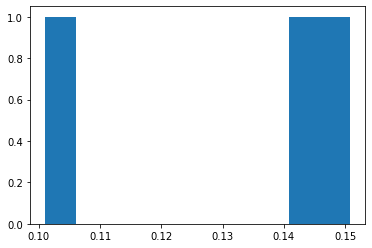

In [38]:
plt.hist(rmsle_t)
plt.show()